# Transfer Functions

In [ ]:
#| default_exp transfer_functions

In [ ]:
#| include: false
%load_ext autoreload
%autoreload 2

In [ ]:
#| include: false
from IPython.display import Image
from IPython.display import HTML

In [ ]:
#| export
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

------------------------

## Problem Settings

It is key to be able to describe the system in an efficient and useful manner.

- To do this, we describe the system mathematically writing the equations of motion in the form of differential equations.
- We have seen how to model the simplified case of a car driving uphill.

The two most popular representations:
- state space representation 
- transfer functions. 

Loosely speaking, **transfer functions** are a Laplace domain representation of your system and they are commonly associated with the era of control techniques labeled classical control theory. 

**State space** is a time domain representation, packaged in matrix form, and they are commonly associated with the era labeled modern control theory.

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/16.ss-tf.png" alt="16.ss-tf" style="width: 800px;"/> </td>
</tr>
</table>

- Each representation has its own set of benefits and drawbacks and as a control engineer we need to use what is best for our problem.
- We will focus on Transfer Functions.



## Definition of Transfer Function
> A transfer function is the Laplace transform of the impulse response of a linear, time-invariant (LTI) system with a single input and single output when you set the initial conditions to zero. 

### The _s_ domain and the Laplace Transform

- The Laplace Transform takes the Fourier Transform one step forward
- Decomposes a time domain signal into both cosines and exponential functions
- For the Laplace transform we need a symbol that represents more than just frequency, $\omega$
- Need to also account for the exponential aspect of the signal. 
- This is where the variable $s$ comes in.

$s$ is a complex number, which means that it contains values for two dimensions:
- one dimension that describes the frequency of a cosine wave
- the second dimension that describes the exponential term. 

It is defined as $s = \sigma + j\omega$. 

Exponential functions that have imaginary exponents, such as $e^{j2t}$, produce two-dimensional sinusoids through Euler’s formula:

$$e^{j\omega t} = cos(\omega t) + jsin(\omega t)$$

For exponential functions that have **real** numbers for exponents:
- Negative real numbers give us exponentially decaying signals 
- Positive real numbers give us exponentially growing signals. 

Two examples are $e^{2t}$, which grows exponentially for all positive time, and $e^{−5t}$, which decays exponentially for all positive time.


Text(0.5, 0, 'time (s)')

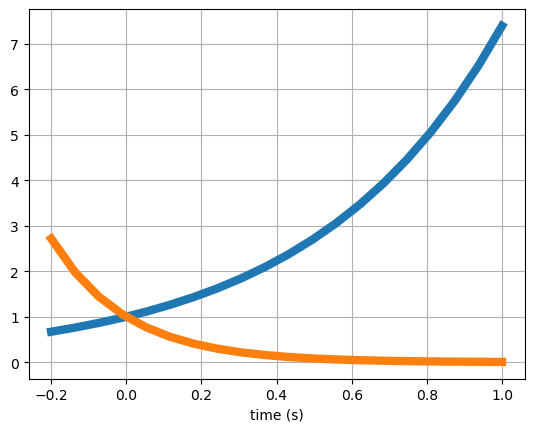

In [ ]:
fig = plt.figure()

t = np.linspace(-0.2, 1, 20)
plt.plot(t, np.exp(2*t), linewidth=6)
plt.plot(t, np.exp(-5*t), linewidth=6)
plt.grid()
plt.xlabel('time (s)')

Now let’s think about our new variable $s$ which has both a real and imaginary component. 

- The equation $e^{st}$ is really just an exponential function multiplied by a sinusoid

$$e^{st} = e^{(\sigma+j\omega)t} = e^{\sigma t}e^{j\omega t}$$

In [ ]:
import cmath

import warnings
warnings.filterwarnings('ignore') # we know we are forcing our hands below, so no need to be reminded..

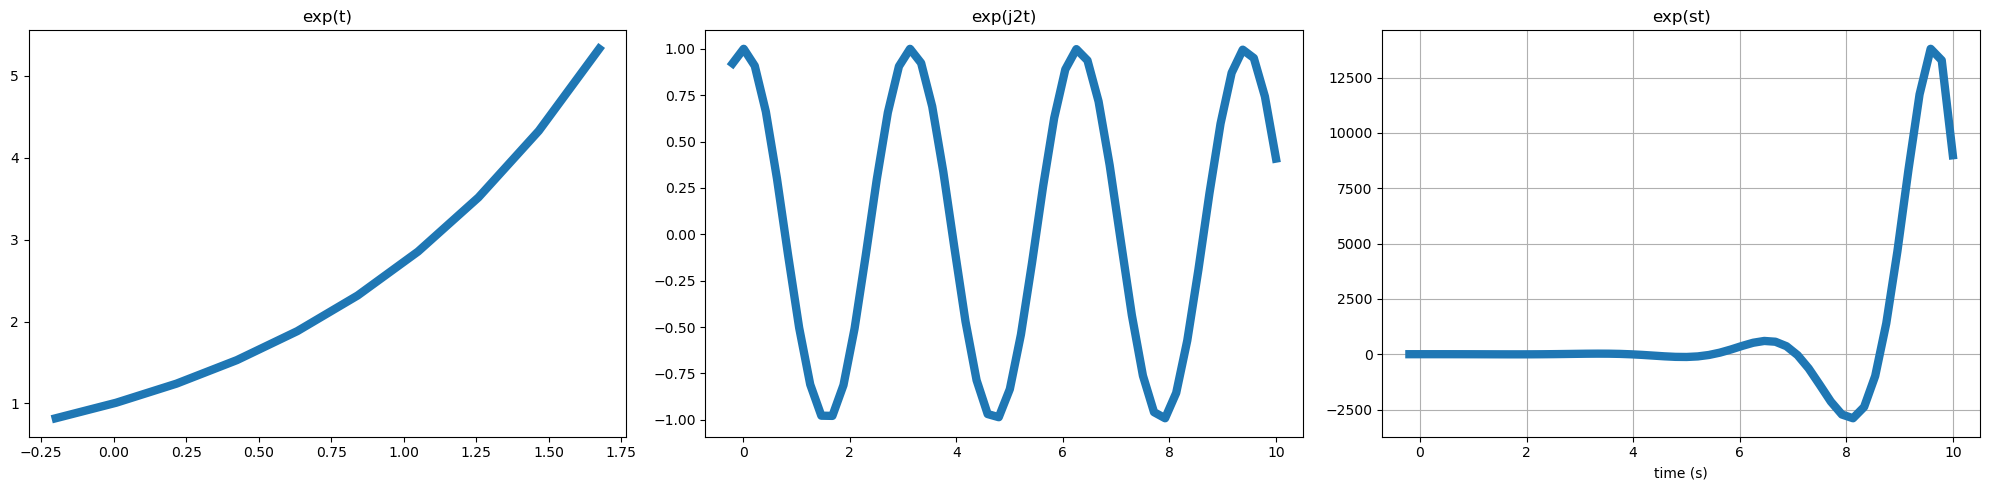

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,5))

t = np.linspace(-0.2, 10, 50) # time range

# s = 1 + j2
s = complex(1, 2) 

axs[0].plot(t[:10], np.exp(t[:10]), linewidth=6); axs[0].set_title('exp(t)')
axs[1].plot(t, np.exp(complex(0,2)*t), linewidth=6); axs[1].set_title('exp(j2t)')
axs[2].plot(t, np.exp(t)*np.exp(complex(0,2)*t), linewidth=6); axs[2].set_title('exp(st)')

plt.grid()
plt.xlabel('time (s)')
fig.tight_layout()

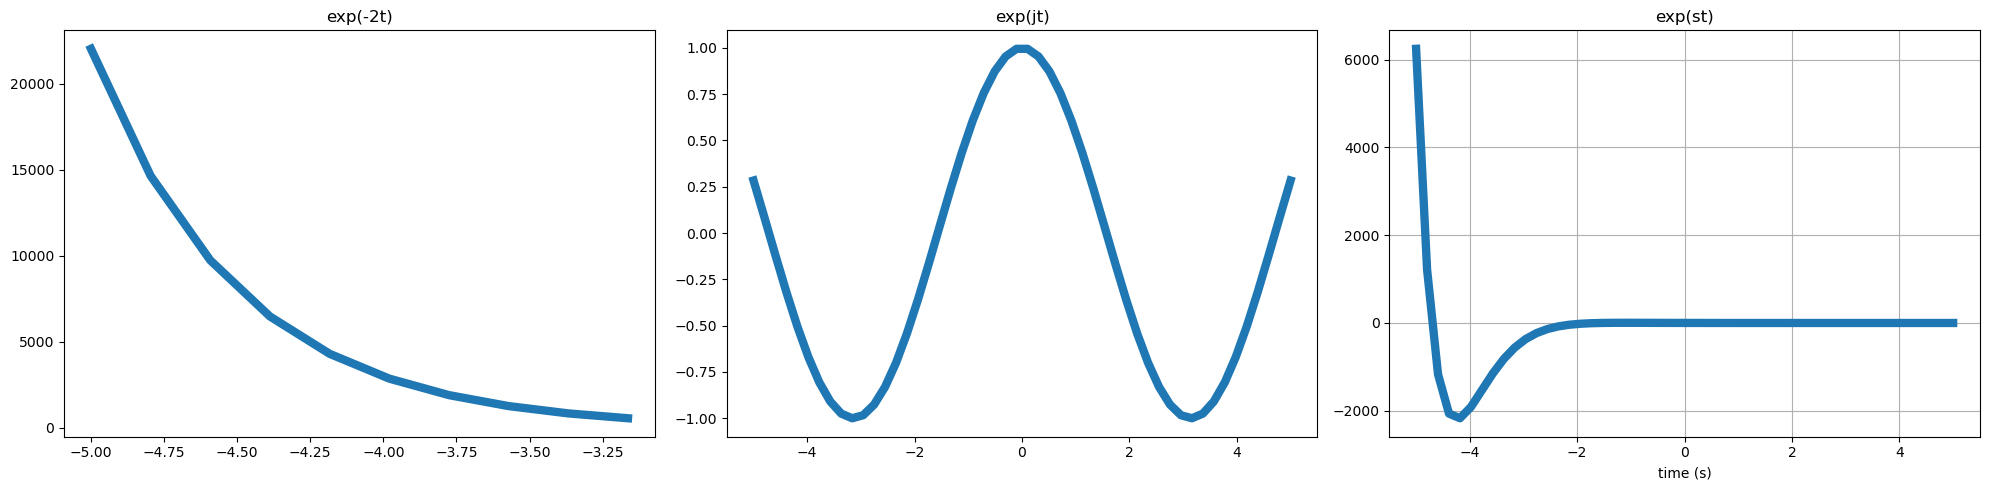

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20,5))

t = np.linspace(-5, 5, 50)

# s = -2 + j
s = complex(-2, 1) 

axs[0].plot(t[:10], np.exp(-2*t[:10]), linewidth=6); axs[0].set_title('exp(-2t)')
axs[1].plot(t, np.exp(complex(0, 1)*t), linewidth=6); axs[1].set_title('exp(jt)')
axs[2].plot(t, np.exp(-2*t)*np.exp(complex(0, 1)*t), linewidth=6); axs[2].set_title('exp(st)')

plt.grid()
plt.xlabel('time (s)')
fig.tight_layout()

- We  can combine the two parts of $s = \sigma + j\omega$ into a two-dimensional plane where the real axis is the exponential line and the imaginary axis is the frequency line. 

- The value of $s$ provides a location in this plane and describes the resulting signal, $e^{st}$, as function of the selected $\omega$ and $\sigma$.

<table style='margin: 0 auto' rules=none>
<tr>
<td> <img src="img/17.s-plane.png" alt="17.s-plane" style="width: 700px;"/> </td>
</tr>
</table>

--------------------------------

### The Laplace Transform

The Laplace transform is an integral transform that converts a function of a real variable 
$t$ (e.g., $time$) to a function of a complex variable $s = \sigma + j\omega \in \mathbb{C}$ (complex frequency). 


$${\displaystyle F(s)={\mathcal {L}}\{f\}(s)=\int _{0}^{\infty }f(t)e^{-st}\,dt.}$$


The inverse Laplace transform is:

$${\displaystyle f(t)={\mathcal {L}}^{-1}\{F(s)\}(t)={\frac {1}{2\pi j}}\lim _{\omega\to \infty }\int _{\sigma -j\omega}^{\sigma +j\omega}e^{st}F(s)\,ds}$$

The Laplace transform is particularly important because it is a tool for solving differential equations: _it transforms linear differential equations into algebraic equations, and convolution into multiplication!_

- Derivatives and integrals become algebric operations

From a system perspective, the Transfer function expresses the relation between the Laplace Transform of the input and that of the output:

$$ Y(s)=\mathbf{c}^T(s\mathbf{I}-\mathbf{A})^{-1} \mathbf{b} U(s) $$

--------------------

### Properties of the Laplace Transform: relationships between time and frequency

The Laplace transform has a number of properties. These are really useful to calculate the transforms without using its integral definition.


| Property | Time domain | Frequency domain (s) |
| ---------| --------------| --------------|
| Linearity | $af(t)$ + $bg(t)$ | $aF(s)+bG(s)$ | 
| Time shift (delay) | $f(t-\tau)$ | $e^{-\tau s}F(s)$
| Frequency shift | $f(t)e^{\alpha t}$ | $F(s-\alpha)$
| Derivative | $\frac{df}{dt}(t)$ | $sF(s) − f(0)$ |
| Second Derivative | $\frac{df^2}{d^2t}(t)$ | $s^2F(s)-sf(0)-f'(0)$ |
| Integral | $\int _{0}^{t}f(\tau )\,d\tau$ = $(u*f)(t)$ | $\frac{1}{s}F(s)$ |
| Convolution | $(f*g)(t)$ = $\int _{0}^{t} f(\tau )g(t$-$\tau )d\tau$ | $F(s)G(s)$ |
|  | $t\rightarrow\inf$ | $s\rightarrow 0$ |
|  | $t\rightarrow 0$ | $s\rightarrow \inf$ |


From this table it is easier to calculate Laplace transforms of known functions:

In [ ]:
#| export
def step(t, step_time=0):
    """Heaviside step function"""
    return 1 * (t >= step_time) #np.ones((1,len(t))).squeeze()

def ramp(t):
    return t * (t >= 0)

def delta(t, delta_t=0, eps=None):
    if eps is None and len(t) > 1: 
        _eps=t[1]-t[0]
    else:
        _eps = eps
    return step(t, delta_t)-step(t, delta_t+_eps)

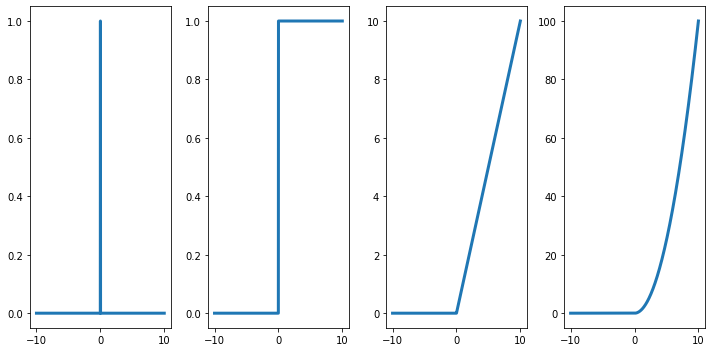

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(10, 5))

t = np.linspace(-10,10,1000)

axs[0].plot(t, delta(t), linewidth=3)
axs[1].plot(t, step(t), linewidth=3)
axs[2].plot(t, ramp(t), linewidth=3)
axs[3].plot(t, ramp(t)**2, linewidth=3)

fig.tight_layout()

Note that the `step` function is the derivative of the `ramp`, and that the `ramp` is the derivative of the `quadratic` function.

--------------------------------------------

### Transforms of known functions

### Delta function

If we then want to calculate the Laplace transform of the `delta` $\delta(t)$ function:

$${\displaystyle F(s)={\mathcal {L}}\{f\}(s)=\int _{0}^{\infty }\delta(t)e^{-st}\,dt.}$$

where

$$\delta(t)=0, \forall t \neq 0 $$
$$\int _{-\infty}^{\infty } \delta(t)dt=1$$

$${\displaystyle F(s)={\mathcal {L}}\{f\}(s)=\int _{0}^{\infty }\delta(t)e^{-st}\,dt.}=e^{-s0}=1$$

### Step function

Or of the `step` $1(t)$ function:

$${\displaystyle F(s)={\mathcal {L}}\{f\}(s)=\int _{0}^{\infty }1(t)e^{-st}\,dt.}$$

where

$$1(t)=0, \forall t < 0 $$
$$1(t)=1, \forall t \geq 0 $$


$${\displaystyle F(s)={\mathcal {L}}\{f\}(s)=\int _{0}^{\infty }1(t)e^{-st}\,dt.} = \int _{0}^{\infty}e^{-st}\,dt. = -\frac{e^{-st}}{s} \Bigg|^\infty_0 = -\frac{1}{s} \bigg( \lim_{t\rightarrow \infty} e^{-st} - \lim_{t\rightarrow 0} e^{-st} \bigg) = \frac{1}{s}$$



A great thing about working with linear systems is that usually we don’t have to perform the Laplace transform integration by hand.

Most the Laplace transforms for most functions that we will encounter have been solved many times and are available already collected into tables.

### Putting this all Together

Let's consider the rolling cart example:

<tr>
<td> <img src="img/18.rolling-cart.png" alt="18.rolling-cart" style="width: 700px;"/> </td>
</tr>



We can model this cart as:

$$m\ddot{x} = F_{input}(t) - F_{dumper}(t) - F_{spring}(t)$$

And since: $F_{spring}(t)=kx(t)$, $F_{dumper}(t)=b\dot{x}(t)$

We obtain:

$$m\ddot{x} + kx(t) + b\dot{x}(t) -  F_{input}(t) = 0$$

We can convert this system model into a transfer function:
- it’s a linear, 
- time-invariant system,
- there is a single input, $F_{input}$,
- and a single output, $x$. 

To calculate the Transfer Function we need to take the Laplace Transform of the impulse response of the system.

To do so, let's set our input to $F_{input}(t)=\delta(t)$ and solve for the response $x(t)$.


$$m\ddot{x} + kx(t) + b\dot{x}(t) -  \delta(t) = 0$$

- Solving linear, ordinary differential equations in the time domain can be time consuming. 
- We can make the task easier by taking the Laplace transform of the entire differential equation, one term at a time, and solve for the impulse response in the $s$ domain directly.
- Simply take each term and replace with the corresponding $s$ domain equivalent.

| | |
|---|---|
| time domain | $\large m\ddot{x} + kx(t) + b\dot{x}(t) -  \delta(t) = 0$ |
| $s$ domain  | $\large (ms^2 + bs + k)X(s) - 1 = 0 $|
| $X(s)$ is the impulse response in the $s$ domain  | $\large X(s) = \frac{1}{m*s^2 + bs + k}$|

*note that the initial conditions are zeros*

To go back to the time domain we could preform the inverse Laplace transform on $X(s)$.

------------------------------------

## Table of Laplace transforms

<tr>
<td> <img src="img/table-1-complete-laplace-transform-table-cut.png" alt="table-1-complete-laplace-transform-table" style="width: 600px;"/> </td>
</tr>

## Inverse Laplace Transform: Partial fraction decomposition

To find the inverse Laplace transform of a complicated function, we can convert the function to a sum of simpler terms for which we know the Laplace transform of each term. The result is called a partial-fraction expansion.

Given:

$$Y(s) = G(s)U(s) = \frac{N(s)}{D(s)}U(s)$$

where the order of $N(s)$ is less than the order of $D(s)$, then a partial-fraction expansion can be made.

If the order of $N(s)$ is greater than or equal to the order of $D(s)$, then $N(s)$ must be divided by $D(s)$ successively until the result has a remainder whose numerator is of order less than its denominator.

We want to expand $G(s)$ into the sum of functions for which we already know the inverse transform, then thanks to the linearity we can simply sum them all up to obtain the inverse of the entire function:

### Case 1. Roots of the Denominator of F(s) Are Real and Distinct

Let's suppose we have all **distinct poles**:

$$ D(s) = \prod^{n}_{k=1}{(s-p_k)}$$

we want to find the coefficient $P_k$ such that:

$$ \frac{N(s)}{\prod^{n}_{k=1}{(s-p_k)}} = \sum^{n}_{k=1}\frac{P_k}{s-p_k}$$

Multiplying for $(s-p_i)$:

$$ (s-p_i)\frac{N(s)}{\prod^{n}_{k=1}{(s-p_k)}} = (s-p_i)\sum^{n}_{k=1}\frac{P_k}{s-p_k}$$

we can obtain:

$$P_i = [(s-p_i)G(s)] \big|_{s=p_i}$$

and finally:

$$ g(t) = \mathcal {L}^{-1}[G(s)]=\mathcal {L}^{-1} \bigg[\sum^{n}_{k=1}\frac{P_k}{s-p_k}\bigg] = \sum^{n}_{k=1} P_k e^{p_kt}$$

For example:

$$G(s) = \frac{s-10}{(s+2)(s+5)}$$


$$P_1=(s+2)\frac{s-10}{(s+2)(s+5)}\bigg|_{s=-2}=-\frac{12}{3}=-4$$
$$P_2=(s+5)\frac{s-10}{(s+2)(s+5)}\bigg|_{s=-5}=\frac{-15}{-3}=5$$

which means that:

$$G(s) = \frac{-4}{(s+2)} + \frac{5}{(s+5)}$$

and finally:

$$ g(t) = \mathcal {L}^{-1}[G(s)] = -4e^{-2t} + 5e^{-5t}$$

### Case 2. Roots of the Denominator of F(s) Are Real and Repeated

If we have **muliple poles** the decomposition is similar.


Let's consider, as an example

$$
Y(s) =  \frac{2}{(s+1)(s+2)^2}
$$

The roots of $(s+2)^2$ in the denominator are repeated, since the factor is raised to an integer power higher than 1. In this case, the denominator root at $-2$ is a multiple root of multiplicity 2.

We can write the partial-fraction expansion as a sum of terms, where each factor of the denominator forms the denominator of each term. 

**In addition, each multiple root generates additional terms consisting of denominator factors of reduced multiplicity.**

In our case

$$
Y(s) =  \frac{2}{(s+1)(s+2)^2} = \frac{K_1}{(s+1)} + \frac{K_2}{(s+2)^2} + \frac{K_3}{(s+2)}
$$

- We obtain $K_1$ as before. In this case $K_1=2$

- We obtain $K_2$ multiplying the previous equation by $(s+2)^2$:

$$
\frac{2}{(s+1)} = \frac{K_1(s+2)^2}{(s+1)} + K_2 + K_3(s+2)
$$

When $s \rightarrow -2$, $K_2=-2$

- We obtain $K_3$ differentiating the previous equation with respect to $s$:

$$
\frac{-2}{(s+1)^2} = \frac{2(s+2)K_1}{(s+1)^2} + K_3
$$

From which $K_3$ can be isolated and found if we let $s \rightarrow -2$. Hence, $K_3=-2$.

In this case then:


$$
Y(s) =  \frac{2}{(s+1)(s+2)^2} = \frac{2}{(s+1)} + \frac{-2}{(s+2)^2} + \frac{-2}{(s+2)}
$$

and the inverse transform is:

$$
y(t) = 2e^{-t} - 2te^{-2t} -2e^{-2t}
$$

If the denominator root is of higher multiplicity than 2, successive differentiation would isolate each residue in the expansion of the multiple root.

In general, given a $H(s)$ whose denominator has real and repeater roots:

$$H(s) = \frac{N(s)}{(s+p_1)^r(s+p_2)...(s+p_n)}$$

We can find the general expression for $K_1$ (the coefficient of the roots with multiplicity greater than 1):

$$
K_i = \frac{1}{(i-1)!}\frac{d^{i-1}(F(s)(s+p_1)^r)}{ds^{i-1}}\Big|_{s\rightarrow-p_1} \;\; i=1,2,...,r 
$$


### Case 3. Roots of the Denominator of F(s) Are Complex or Imaginary

The technique used for the partial-fraction expansion of $F(s)$ with real roots in the denominator can be used for complex and imaginary roots. 

However, the residues of the complex and imaginary roots are themselves complex conjugates. 

In this case, the resulting terms can be identified as:

$$
\frac{e^{j\theta}+e^{-j\theta}}{2} = \cos{\theta}
$$

and

$$
\frac{e^{j\theta}-e^{-j\theta}}{2j} = \sin{\theta}
$$


For example:

$$
F(s) = \frac{3}{s(s^2+2s+5)} = \frac{3}{s(s+1+j2)(s+1-j2)} = \frac{K_1}{s} + \frac{K_2}{s+1+j2} + \frac{K_3}{s+1-j2}
$$

$K_1$ is found as usual, and found $K_1=3/5$.


To find $K_2$:

$$
K_2 = \frac{3}{s(s+1-j2)}\Big|_{s\rightarrow -1-j2} = \frac{-3}{20}(2+j1)
$$

$K_3$ is found to be the complex conjugate of $K_2$.

$$
F(s) = \frac{3/5}{s} - \frac{3}{20}\Big(\frac{2+j1}{s+1+2j} + \frac{2-j1}{s+1-2j}\Big)
$$

which we can inverse transform to obtain:

$$
f(t) = \frac{3}{5} - \frac{3}{20}\Big[ (2+j1)e^{-(1+j2)t} + (2-j1)e^{-(1-j2)t} \Big]
$$

$$
f(t) = \frac{3}{5} - \frac{3}{20} e^{-t}\Big[4 \Big( \frac{e^{j2t}+e^{-j2t}}{2}\Big) + 2 \Big(\frac{e^{j2t}-e^{-j2t}}{2j} \Big) \Big]
$$


$$
f(t) = \frac{3}{5} - \frac{3}{5} e^{-t} \Big( cos(2t) + \frac{1}{2}sin(2t) \Big) = 0.6 - 0.671e^tcos(2t-\phi)
$$

where $\phi = arctan0.5=26.57^o$

--------------------

### Some more on the Laplace transform

- Convert dfferential problems into algebric ones (finding the poles of the system)
- Makes it possible to understand the system output for a given input
- Using the transfer function it is possible to represent the input/output relationship
- Interconnected systems can be represented using block diagrams
- However, _it does not allow analysing the controllability and observability of each single block!_

--------------------

## [Sympy](https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html)

The sympy Python module makes it easier to work with Laplace transforms. Let's import it:

In [ ]:
import sympy

In [ ]:
sympy.init_printing()

In [ ]:
# Let's also ignore some warnings here due to sympy using an old matplotlib function to render Latex equations.
import warnings

In [ ]:
warnings.filterwarnings('ignore')

And let’s define the symbols with need to work with.

In [ ]:
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

Sympy provides a function called `laplace_transform` to easily calculate Laplace transforms:

For example, if we want to know the Laplace transform of $e^{\alpha t}$

In [ ]:
f = sympy.exp(a*t)
f

In [ ]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

We can define a function to make it easier:


In [ ]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)

def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

In [ ]:
L(f)

In [ ]:
invL(L(f))

where $\theta(t)$ is the name used by Sympy for the unit step function.

More transforms:

In [ ]:
omega = sympy.Symbol('omega', real=True)
exp = sympy.exp
sin = sympy.sin
cos = sympy.cos
functions = [1,
         t,  
         t**2,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

In [ ]:
Fs = [L(f) for f in functions]

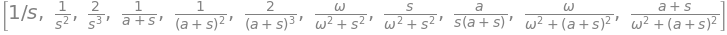

In [ ]:
Fs

------------------------------------------------------------

## Transfer function matrix

We can apply the Laplace transform to the state equation of LTI systems

- We start from the state equations and use the derivate operator of $s$
- We also consider only the forced output of the system

$$\dot{x} = Ax + Bu;\; y = Cx$$

$$sX = AX + BU;\; Y = CX$$

$$(sI-A)X=BU;\; Y = CX$$

$$X = (sI-A)^{-1}BU;$$ $$Y = C(sI-A)^{-1}BU$$

Matrix $G(s)=C(sI-A)^{-1}B$ is the _Transfer Function Matrix_(or _Transfer Matrix_).

Each element of $G(s)$ expresses the **dynamic** relation (there is $s$) between an input channel and an output channel.

$$
\begin{equation}
G(s)=
\begin{bmatrix}
g_{11}(s) & ... & g_{1m}(s)\\
... & ... & ... \\
g_{p1}(s) & ... & g_{pm}(s)
\end{bmatrix}
\end{equation}
$$

$g_{ij}(s)$: Transfer function between $u_j$ and $y_i$, each  $g_{ij}(s)=\frac{N(s)}{D(s)}$

### Matrix transfer function and poles

$$G(s) = C(sI-A)^{-1}B$$

- we need to calculate the inverse of a matrix:

$$A^{-1} = \frac{Adjugate(A)}{det(A)}$$

$$\Downarrow$$

$$G(s) = \frac{CAdjugate(sI-A)B}{det(sI-A)}$$



### Poles and zeros

- Roots of the denominator of $G(s)$ (values of $s$ that make $den(G)=0$) are called _poles_ of the system.
- A pole is a value of $s$ that causes $G(s)\rightarrow \inf$ (e.g. $\frac{1}{s}$, when $s=0$, $G(s)\rightarrow \inf$)
- A zero is a value of $s$ that causes $G(s)\rightarrow 0$  (e.g. $s$, when $s=0$, $G(s)=0)$

- The poles of the system $G(s)$ are, in general, a _subset_ of the roots of the eq. $det(sI-A)=0$

- which are the same as the roots of the characteristic equation: $det(A-\lambda I)=0$

- this means that the poles of the system are a subset of the eigenvalue of the matrix $A$.


<tr>
<td> <img src="img/N.poles-zeros-ex.png" alt="N.poles-zeros-ex" style="width: 700px;"/> </td>
</tr>


-------

Sidenote - Adjugate Matrix

The adjugate (or adjoint) of a square matrix is a matrix obtained by taking the transpose of the matrix of cofactors of the original matrix.

To compute the adjugate of a matrix A, we first calculate the matrix of cofactors of A. The matrix of cofactors of A is obtained by multiplying each element of A by the corresponding determinant of the submatrix obtained by removing the row and column of the element, and then multiplying by -1 if the sum of the row and column indices is odd.

Once we have the matrix of cofactors, we take its transpose to obtain the adjugate of A.

The adjugate of a matrix A is often denoted as adj(A) or adjug(A). It has many applications in linear algebra and is particularly useful for computing the inverse of a matrix, as the inverse of A can be expressed as:

$$A^-1 = \frac{adj(A)}{det(A)}$$

where $det(A)$ is the determinant of A.

Example:

$$
A = \begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}
$$

And

$$
Adj(A) = \begin{bmatrix}
d & -b \\
-c & a \\
\end{bmatrix}
$$

----


## Transfer function, controllability and observability

- For each $g_{ij}(s)$, the poles of the transfer function are only the poles that are **controllable** from input $u_j$ and **observable** from the output $y_i$.

## Single Input, Single Output (SISO)

It is similar to what we had before, but now we only have one input and one output:

$$\dot{x} = Ax + bu;\; y = c^Tx$$

$$G(s) = c^T(sI-A)^{-1}b$$

Again, the transfer function only includes poles that are controllable and observable.

--------------------------------------------

## Stability in Classical Control

- Stability of a system is a property that describes how the system behaves in response to small perturbations or changes. 
- A system is considered stable if it is able to maintain a desired state or behavior in the face of disturbances or variations in its environment.



- Stability is the property of the system to stay close to its equilibrium $\bar{x}$ when perturbed.

- An equilibrium is stable if 

$$ \forall \epsilon >0, \exists \delta_\epsilon: ||\bar{x}|| \le \delta_\epsilon \Rightarrow ||x(t)||\le\epsilon,\;\; \forall t\ge 0$$

- Asymptotic stability: the property of the system to go back to its equilibrium when perturbed: $||x(t)|| \rightarrow \bar{x}$, for $t\rightarrow \inf$.

- Assumes zero input: it is a definition w.r.t. state perturbations

**BIBO stability**
- A system is BIBO stable (Bounded Input, Bounded Output) if for each limited input, there is a limited output
- For linear systems: BIBO stability if and only if poles of the transfer functions have Re $<0$



A system is said to be BIBO stable if there exists a finite positive constant $M$ such that, for any input $u(t)$ that satisfies $|u(t)| \le B$ (i.e., bounded), the corresponding output $y(t)$ satisfies $|y(t)| \le M$, where $M$ and $B$ are finite positive constants.



**Intuition:** You can think of stability as meaning that your system’s response decays over time - instability implies the opposite is true, that a finite input will cause your system to respond with increasing amplitude over time, leading to an unstable system. 

Note that it is possible to be maginally stable: the system has an infinite, oscillatory response (e.g., sinusoid at constant frequency and amplitude). 

**Stability margins:** 
- Even if your system is stable, unmodelled dynamics or parameter variations could make it unstable.
- Stability margins make it possible to evaluate the robustness of the system to these variations.

Note that too much stability is not necessarily a good thing: a system that is too stable means that will tend not to move from its equilibrium even when you desired it to do so.


## System stability and system matrix

System stability depends on the eigenvalues of the system matrix $A$ or on the poles of the transfer function:
- eigenvalues with $Re < 0$, system is asymptotically stable
- eigenvalues with $Re \le 0$, and $Re=0$ have multiplicity 1 then the system is stable

When we analyse the stability of linearised systems things can be more complicated.
- If the linear system is aymptotically stable, then the non-linear system is stable (around the equilibrium): we can always move close enough to the equilibrium to be inside its region of stability)

- If the linear system is marginally stable, we cannot say anything on the non-linear system (other non-linear dynamics become key)


## System stability and transfer function

- The stability of a linear system may be determined directly from its transfer function. 
- An $n$-th order linear system is asymptotically stable only if all of the components in the response
from a finite set of initial conditions decay to zero as time increases, or:
$$
\lim \limits_{t\rightarrow\inf} \sum_{i=1}^{n} C_ie^{p_it}
$$

where the $p_i$ are the system poles.


For linear systems modelled through their transfer function $G(s)=\frac{N(s)}{D(s)}$, we need to analyse the roots of the characteristic equation $D(s)=0$:
- the system is stable if all the roots of the characteristic equation have negative real part
- the system is stable if all its poles have negative real part. 


_In order for a linear system to be stable, all of its poles must have negative real parts,
that is they must all lie within the left-half of the s-plane. An "unstable" pole, lying in
the right half of the s-plane, generates a component in the system homogeneous response
that increases without bound from any finite initial conditions. A system having one
or more poles lying on the imaginary axis of the s-plane has non-decaying oscillatory
components in its homogeneous response, and is defined to be marginally stable._

------------------------

## More structural properties
- Stability only depends on the structure of the system (matrix A)

- Other aspects:
   - What input do we need to take the system into a given state?
   - Given the output of a system, how can we determine the state?
   
   
### Controllability
- A state $x$ is controllable if exists an input $u$ that can take the trajectory of the system from state $0$ to $x$ in finite time.
- A system is controllable if all its states are controllable


### Observability
- An initial state is observable if it is possible to determine $x$ measuring the system output $y$
- A system is observable if all its states are observable


--------------------

## Laplace Transforms Examples

### Example 1

$$F(s)=\frac{10}{s^2+12s+40}$$

- poles: $-6 \pm \sqrt{36-40} = -6 \pm \sqrt{-4} = -6 \pm j2$

- let's call $\alpha_1=-6 + j2$, $\alpha^*_1=-6 - j2$

We can then re-write:
$$
F(s) = \frac{10}{[s - (-6+j2)][s - (-6-j2)]} = \frac{10}{(s-\alpha_1)(s-\alpha^*_1)}
$$

To calculate the inverse transform we need to find the coefficients:

$$
F(s) = \frac{10}{(s-\alpha_1)(s-\alpha^*_1)} = \frac{A}{s-\alpha_1} + \frac{B}{s-\alpha^*_1}
$$

where $A$ and $B$ must be complex conjugated: $B=A^*$ (or we would not get real cofficient in $F(s)$).

$$
F(s) = \frac{10}{(s-\alpha_1)(s-\alpha^*_1)} = \frac{A}{s-\alpha_1} + \frac{A^*}{s-\alpha^*_1}
$$


$$
A = \lim \limits_{s\rightarrow \alpha_1}  \frac{10}{(s-\alpha_1)(s-\alpha^*_1)} (s-\alpha_1) = \frac{10}{\alpha_1-\alpha_1^*} = \frac{10}{2j \text{Img(}\alpha_1)}
$$

this is because $a + jb - (a - jb) = 2jb$


$$
B = \lim \limits_{s\rightarrow \alpha^*_1}  \frac{10}{(s-\alpha_1)(s-\alpha^*_1)} (s-\alpha^*_1) = \frac{10}{\alpha^*_1-\alpha_1} = -\frac{10}{2j \text{Img(}\alpha_1)}
$$


Let's see now the inverse transform:

$$
F(s) = \frac{A}{s-\alpha_1} + \frac{A^*}{s-\alpha^*_1} \rightarrow \mathcal{L^{-1}}  \rightarrow Ae^{\alpha_1t} + A^*e^{\alpha^*_1t}
$$

where we could explicit $\alpha_1 = \sigma + j\omega$, and $A=|A|e^{j\Phi_A}$, $A^*=|A|e^{-j\Phi_A}$

$$
f(t) = Ae^{\alpha_1t} + A^*e^{\alpha^*_1t} = |A|e^{j\Phi_A}e^{(\sigma +j\omega)t} + |A|e^{-j\Phi_A}e^{(\sigma -j\omega)t} = |A|e^{j\Phi_A}e^{\sigma t} e^{+j\omega t} + |A|e^{-j\Phi_A}e^{\sigma t}e^{-j\omega t}
$$

we can group things together:

$$
f(t) = |A|e^{j\Phi_A}e^{\sigma t} e^{+j\omega t} + |A|e^{-j\Phi_A}e^{\sigma t}e^{-j\omega t} = |A|e^{\sigma t} \big [   e^{j\Phi_A}e^{j\omega t} + e^{-j\Phi_A}e^{-j\omega t}  \big ] = |A|e^{\sigma t} \big [   e^{j(\Phi_A+\omega t)} + e^{-j(\Phi_A+\omega t)}  \big ]
$$

and since $\frac{e^{jx}+e^{-jx}}{2}=cos(x)$, we can write the above expression as: 

$$
f(t) = |A|e^{\sigma t} \big [   e^{j(\Phi_A+\omega t)} + e^{-j(\Phi_A+\omega t)}  \big ] = 2|A|e^{\sigma t}\cos(\Phi_A+\omega t)
$$

As expected we have an oscillatory term that could decrease or increase depending on the value of $\sigma$ (real part of the poles).

-------

### Example 2

$$F(s) = \frac{100}{(s+1)(s^2+4s+13)}$$

- poles: $s=-1, s=-2\pm j3$

We can write:

$$
F(s) = \frac{100}{(s+1)(s^2+4s+13)} = \frac{A_1}{(s+1)} + \frac{B_1}{(s-\alpha_1)} + \frac{B^*_1}{(s-\alpha^*_1)}
$$

Where we can calculate the value of the coefficient $A_1$:

- for the pole in $s=-1$
   $$
   A_1 = \frac{100}{s^2+4s+13} \bigg |_{s=-1} = \frac{100}{1-4+13} = 10
   $$

- for the pole in $s=\alpha_1=-2+j3$
   $$
   B_1 = (s-\alpha_1)\frac{100}{(s-\alpha_1)(s+1)(s-\alpha^*_1)} \bigg |_{s=-2+j3} =
   \frac{100}{(-2+j3+1)(-2+j3-(-2+j3)} = \frac{100}{(-1+j3)6j} = \frac{100}{-18-6j} \\
   = \frac{100}{-18-6j}\frac{-18+6j}{-18+6j} = \frac{100}{|-18-6j|^2}(-18+6j) = -\frac{100}{360}6(3-j)=-\frac{5}{3}(3-j)
   $$

- note: $z^{-1} = \frac{z^*}{|z|^2}$



and the inverse transform is:

$$
f(t) = 10e^{-t} + 2|B_1|e^{-2t}cos(3t+\arg(B_1))
$$

### Example 3

$$
F(s) = \frac{s+3}{s(s+7)(s+1)} = \frac{A}{s} + \frac{B}{s+7} + \frac{C}{s+1}  
$$

Note that when we apply partial fraction decomposition we do:

$$
\bigg [ \frac{A}{s} + \frac{B}{s+7} + \frac{C}{s+1} \bigg ]  (s+7) = \frac{A(s+7)}{s} + \frac{B(s+7)}{s+7} + \frac{C(s+7)}{s+1} \bigg | _{s=-7} = B 
$$

so if we calculate the limits of both sides we can exactly what we want.

we can then 

$$
B = \lim \limits_{s\rightarrow-7} \frac{s+3}{s(s+7)(s+1)} (s+7) = \frac{-4}{-7(-6)} = \frac{-4}{42} = \frac{-2}{21}
$$

we can then calculate the other terms:

$$
A = \lim \limits_{s\rightarrow 0} \frac{s+3}{s(s+7)(s+1)} (s) = \frac{3}{7}
$$

$$
C = \lim \limits_{s\rightarrow -1} \frac{s+3}{s(s+7)(s+1)} (s+1) = \frac{2}{-6} = -\frac{1}{3}
$$

Now we can do the inverse transform of:

$$
F(s) = \frac{s+3}{s(s+7)(s+1)} = \frac{3}{7}\frac{1}{s} - \frac{2}{21}\frac{1}{s+7} - \frac{1}{3}\frac{1}{s+1} 
$$

$$\Downarrow$$

$$
f(t) = \frac{3}{7} 1(t) - \frac{2}{21}e^{-7t} - \frac{1}{3}e^{-t}
$$


---------------------